In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [29]:
data1 = "pcr_tested_2022.csv"
data2 = "newly_confirmed_cases_daily_2022.csv"
df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)

In [30]:
print(df1.shape)
print(df1.info())
display(df1.head())
print(df2.shape)
print(df2.info())
display(df2.head())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     365 non-null    object
 1   pcr_num  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB
None


,Date,pcr_num
0,2022/1/1,7002
1,2022/1/2,11365
2,2022/1/3,5605
3,2022/1/4,87417
4,2022/1/5,85750


(365, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       365 non-null    object
 1   ALL        365 non-null    int64 
 2   Hokkaido   365 non-null    int64 
 3   Aomori     365 non-null    int64 
 4   Iwate      365 non-null    int64 
 5   Miyagi     365 non-null    int64 
 6   Akita      365 non-null    int64 
 7   Yamagata   365 non-null    int64 
 8   Fukushima  365 non-null    int64 
 9   Ibaraki    365 non-null    int64 
 10  Tochigi    365 non-null    int64 
 11  Gunma      365 non-null    int64 
 12  Saitama    365 non-null    int64 
 13  Chiba      365 non-null    int64 
 14  Tokyo      365 non-null    int64 
 15  Kanagawa   365 non-null    int64 
 16  Niigata    365 non-null    int64 
 17  Toyama     365 non-null    int64 
 18  Ishikawa   365 non-null    int64 
 19  Fukui      365 non-null    int64 
 20  Yamanashi  365 non-nul

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2022/1/1,466,24,0,1,1,0,0,2,2,...,0,0,19,0,1,0,0,0,0,46
1,2022/1/2,432,6,0,0,1,0,0,6,2,...,0,0,4,0,1,0,0,0,1,53
2,2022/1/3,788,15,2,3,3,0,1,1,5,...,0,2,12,1,1,1,1,1,4,128
3,2022/1/4,1094,30,2,1,5,0,1,3,9,...,2,2,26,5,8,0,1,0,1,216
4,2022/1/5,2788,60,7,3,2,0,13,12,14,...,6,6,47,10,16,3,2,3,19,629


In [31]:
df1["Date"] = pd.to_datetime(df1["Date"])
df2["Date"] = pd.to_datetime(df2["Date"])

In [32]:
df_merge = pd.merge(df1, df2, on="Date", how="inner")

In [33]:
df_merge.set_index("Date", inplace=True)

In [34]:
df_rolling = df_merge.rolling(window=7).mean()
display(df_rolling)

,pcr_num,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,175619.857143,167782.571429,4754.857143,1478.428571,1599.142857,3314.714286,988.142857,1040.428571,2397.857143,3772.571429,...,2472.285714,1017.142857,8855.857143,1708.571429,1910.857143,3790.857143,2119.142857,2055.142857,2202.857143,902.428571
2022-12-28,172855.714286,169169.285714,4721.571429,1436.714286,1538.857143,3280.571429,940.285714,998.857143,2347.428571,3811.428571,...,2497.142857,1014.857143,8966.714286,1735.571429,1967.714286,3822.142857,2141.000000,2152.571429,2304.000000,973.428571
2022-12-29,177764.142857,170358.571429,4610.142857,1383.285714,1482.428571,3277.285714,900.571429,985.857143,2333.000000,3808.142857,...,2548.000000,1023.000000,9068.142857,1758.285714,2040.142857,3819.142857,2200.000000,2277.714286,2411.285714,1035.000000


In [35]:
print(df_rolling.columns)

Index(['pcr_num', 'ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita',
       'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama',
       'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui',
       'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 'Shiga',
       'Kyoto', 'Osaka', 'Hyogo', 'Nara', 'Wakayama', 'Tottori', 'Shimane',
       'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime',
       'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki',
       'Kagoshima', 'Okinawa'],
      dtype='object')


In [36]:
df_rolling["positive_rate"] = df_rolling["ALL"] / df_rolling["pcr_num"]
print(df_rolling['positive_rate']['2022-12-20'])

0.8292912927947608


<Axes: xlabel='Date'>

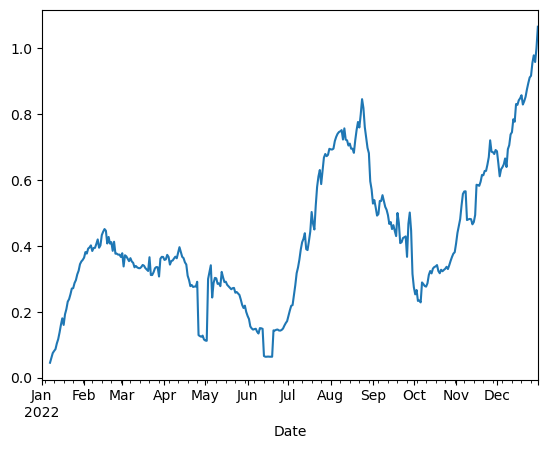

In [37]:
df_rolling["positive_rate"].plot()

In [38]:
reg_df = df_rolling[["pcr_num", "ALL"]].dropna()
X = reg_df["pcr_num"]
y = reg_df["ALL"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    ALL   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     552.5
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           1.72e-74
Time:                        15:57:27   Log-Likelihood:                -4274.8
No. Observations:                 359   AIC:                             8554.
Df Residuals:                     357   BIC:                             8561.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.471e+04   5416.545     -8.254      0.0

In [39]:
print(model.params['pcr_num'])
print(model.rsquared_adj)

0.730786973959438
0.6063848911068871


In [40]:
predict_df = pd.DataFrame({"const": [1], "pcr_num": [200000]})
predicted_cases = model.predict(predict_df)
print(int(predicted_cases[0]))

101448
